# K-Means Breakdown

- Unsupervised
- Partitioning Algorithm
- TODO: Other Clustering 
  - DBSCAN, Density Based Spatial Clusetring of Applications with Noises
    - Minimise the variance between points in each cluster
    - Search for high density region of data points in space


## Keywords of K-Means

- <big>**Partitioning** vs **Clustering**</big>
  - Partitioning tries to _partition_ the data space into partitions, therefore no data point will be left out
    - I.e. all points must be assigned to one of the clusters
    - K-Means is a partitioning algorithm
  - Clustering tries to cluster data points in the data space
    - But outlying points could exist outside any of the clusters
- <big>**Centroid**</big>
  - Center of a cluster, determined by methmatical mean of all data points in the given cluster
- <font color='crimson'><big>**Inter-cluster** vs. **Intra-clsuter**</big></font>
  - Inter means **"between two things"**, so "Inter-cluster" is between the given two clusters
    - Inter-cluster distance measures the distance between two clusters
    - The higher the better, i.e. clusters are separated in greater distance
  - Intra means **"within the given thing"**
    - Intra-cluster distance measures the distance of data points within a given cluster
    - The lower the better, i.e. data points (of a cluster) is compacted together
- <font color='crimson'><big>**Inertia**</big></font>
  - ...
- <font color='crimson'><big>**Silhouette Score**</big></font>
  - ...
- <big>...</big>

## Intuitions and Steps

Steps:

1. Choose number of "K" randomly and place them in the data space
   - I.e. number of centroids
   - NOTE: different starting postiion could be impacted by "Local Minima", so multiple run is preferred
2. Assign all data points to their nearest centroid
3. Recalculate the centroid position with all data points assigned to it
4. Repeat step 2 and 3 until convergence
   - Converged when _centroid positions remain unchanged with successive iterations_
   - Movement below a convergence threshold, e.g. `0.0001`

**K-means++**, implemented by `sklearn.cluster.KMeans` when `init='k-means++'`

- At Step 1, randomly initialises the centroids, based on _Probability Calibration_
  - For the first centroid, using one of the data points
  - For other centroids (`k-1`), using data points based on Probability Calibration
    - **_Higher if a data point is farther from other centroids_**
    - Ensure that centroids are not initiially placed very close together
    - Beter avoid issue with "local mimima"
- At following steps, similar to the regular implementation



## Evaluations

### Inertia & Elbow Method

- Measures "intra-cluster" distance, i.e. distance between data points of a given cluster
- **Sum of Squared Distance between each point and the centroid its assigned to**
  - $n$ = the number of observations in the data, 
  - $x_i$ = the location of a particular observation, 
  - $C_k$ = the location of the centroid of cluster k, which is the cluster to which point 
  - $\sum(x_i - C_k)^2$
​- Lower Inertia is preferred, i.e. smaller distance between data points and its centroid
- NOTE: only measures "intra-cluster" distance, not consider "between-cluster" distance
- **Elbow Method**
  - Comparison of "Inertia" between different values of `k`
  - Choosing the `k` when Inertia has more drastic changes

### Silhouette Analysis

- Measures both "intra" and "between" cluster
- **Silhouette Coefficient**
  - $a$ = the mean distance between the instance and each _other instance in the same cluster_ 
  - $b$ = the mean distance from the instance to each instance _in the nearest other cluster_
    - (i.e., excluding the cluster that the instance is assigned to)
  - $max(a,b)$ = whichever value is greater, $a$ or $b$
  - Calculated for each data point
  - Formula: $(b - a)$, divided by $max(a, b)$
- Value is between -1 and 1 (for each data point)
  - if close to 1, then the point is close to other points in the same cluster
  - if 0, then the point is beween two clusters (its assigned & nearest)
  - if close to -1, then the point is in the wrong cluster
- **Silhouette Score**
  - Taking the average of all the coefficients (of all clustered data points)
  - Higher is better

## Caveats

### Data Pre-processing

- K-Means is measureing the distance between data points, so **scale of variables will affect the distance calculation**
  - Algorithm has no way knowing the unit label of each variable
  - If without scaling
    - significant differences in one variable would be represented as small numbers
    - minor differences in another variable would be represented as much larger numbers
  - Using "Standard Scaler" to sacle to `mean=0` and `std=1`
    - `x-scaled = (xᵢ – mean(x)) / σ`

### Assumptions

- Variance of the distribution of each attribute (variable) is spherical
- All variables have the same variance
- Each cluster has roughly equal number of observations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

sns.set()
plt.rcParams["figure.figsize"] = (12, 4)

## Sample Data

> Generate sample data for the algorithm


In [4]:
from sklearn.datasets import make_blobs

rng = np.random.default_rng(seed=44)
centers = rng.integers(low=3, high=7)
X, y = make_blobs(n_samples=1000, n_features=6, centers=centers, random_state=42)
X.shape, y.shape

((1000, 6), (1000,))

## Modelling with K Means


In [5]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled.shape

(1000, 6)

In [11]:
def kmeans_inertia(num_clusters, x_vals):
    """
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.
    """

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init='auto')
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

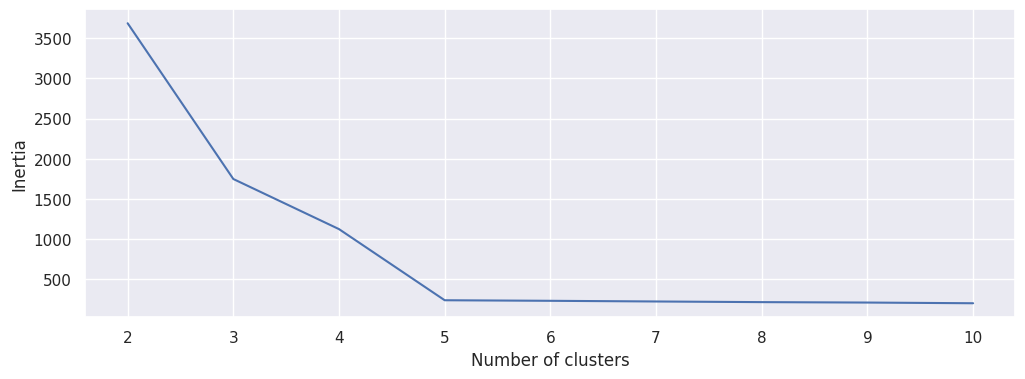

In [14]:
num_clusters = [i for i in range(2, 11)]
inertia = kmeans_inertia(num_clusters, X_scaled)

fig = sns.lineplot(x=num_clusters, y=inertia)
fig.set_xlabel("Number of clusters");
fig.set_ylabel("Inertia");
# k=5 is optimal here

In [16]:
def kmeans_sil(num_clusters, x_vals):
    """
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value
    """
  
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init="auto")
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score

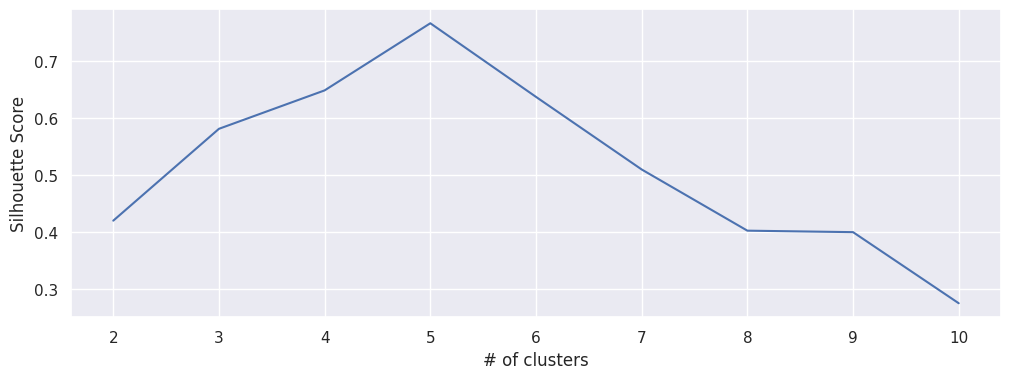

In [19]:
sil_score = kmeans_sil(num_clusters, X_scaled)

plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");
# k=5 is optimal here

Next Steps

- Get the cluster label for each data point and check their statistics 
- Predict on the unseen data 
- For example, suppose you have a marketing program that sends out different promotional emails to different customers, depending on their engagement patterns with your brand. When you get a new customer, you could use a clustering model to assign them to an appropriate marketing campaign, so they see promotions that are most appropriate for them.
- Also, both the cluster predictions and the distance measurements to centroids can be used as new features in supervised learning models. You can take the training data of a supervised learning problem and cluster it, then use either the cluster assignments or the distance matrices as engineered predictive features to improve the predictive power of a supervised learning model.